In [144]:
import os
from sklearn.datasets import load_breast_cancer
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.tree import export_graphviz

from IPython.display import Image 
from pydot import graph_from_dot_data
import pandas as pd
import numpy as np
%matplotlib inline

## Import Breast Cancer Data

In [164]:
#import breast cancer data
from sklearn.datasets import load_breast_cancer
data   = pd.read_csv('BC_data.csv')
df     = pd.DataFrame(data)
df     = df[df.columns[:-1]] #remove the last column as it is empty
df.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


The data set consist of 569 incidences, whith 33 columns. First column is the ID number, second is the diagnosis (M=malignant, B= benign), and the rest of the columns show the descriptive attributes for each incidences. We set the diagnosis as our target vaule Y, and the descriptive features as our independent variables X.

## Missing values

In [163]:
#check for missing values
print('There are {} missing values in the data set'.format(df.isnull().sum().sum()))

There are 0 missing values in the data set


## Check for correlation in independent variables X

In [170]:
# set independent variables X
X = df.iloc[:,2:32]

# Create correlation matrix
corr_matrix = X.corr().abs()

# Select upper triangle of correlation matrix
upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(np.bool))

# Find index of feature columns with correlation greater than 0.95
drop_columns = [column for column in upper.columns if any(upper[column] > 0.95)]

print(drop_columns)

# Drop features 
X = X.drop(X[drop_columns], axis=1)
X.head()

['perimeter_mean', 'area_mean', 'perimeter_se', 'area_se', 'radius_worst', 'perimeter_worst', 'area_worst']


,radius_mean,texture_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,...,concave points_se,symmetry_se,fractal_dimension_se,texture_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,17.99,10.38,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,1.0950,0.9053,...,0.01587,0.03003,0.006193,17.33,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,0.5435,0.7339,...,0.01340,0.01389,0.003532,23.41,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,0.7456,0.7869,...,0.02058,0.02250,0.004571,25.53,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,0.4956,1.1560,...,0.01867,0.05963,0.009208,26.50,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,0.7572,0.7813,...,0.01885,0.01756,0.005115,16.67,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


## Exploring the data balance 

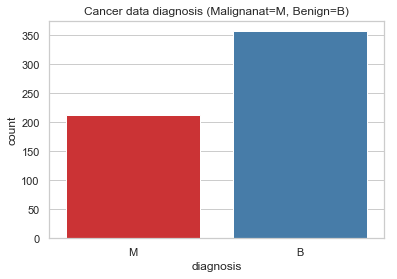

M: 212 B: 357
Percentage of Malignant diagnosis is 37.258347978910365
Percentage of Benign diagnosis is 62.741652021089635


In [177]:
import seaborn as sns
import matplotlib.pyplot as plt
#plot
sns.set(style="white")
sns.set(style="whitegrid")
sns.countplot(x='diagnosis',data=df, palette='Set1')
plt.title('Cancer data diagnosis (Malignanat=M, Benign=B)')
plt.savefig('counter_plot_balance.png', dpi=300)
plt.show()

#percentage calculation 
count_malignant = len(df[df['diagnosis']=='M'])
count_benign = len(df[df['diagnosis']=='B'])
pct_malignant = count_malignant/(count_malignant+count_benign)
print('M:',len(df[df['diagnosis']=='M']), 'B:',len(df[df['diagnosis']=='B']))
print("Percentage of Malignant diagnosis is", pct_malignant*100)
pct_benign = count_benign/(count_malignant+count_benign)
print("Percentage of Benign diagnosis is", pct_benign*100)

When exploring the balance of the target values we see there is 212 incidences of malignant and 357 of benign. An imbalence of ratio 37:63.

## Encoding categorical data

In [172]:
#Set dependent variable Y, and convert DataFrame to numpy array
X = df.iloc[:,2:32].values
Y = df.loc[:, data.columns=='diagnosis'].values.ravel()


# Use LabelEncoder from scikitlearn to convert categorical data to numeric values
# 0 = Malignant, 1 = benign
from sklearn.preprocessing import LabelEncoder
Y = LabelEncoder().fit_transform(Y)


## Split data into train and validation

In [173]:
#Train-Test Split - Dividing into Train and Validation(test) data 80:20
trainingShare = 0.8 
seed = 1
X_train, X_val, Y_train, Y_val =train_test_split(X, Y, 
                                              test_size = 1-trainingShare,
                                              random_state=seed,shuffle=True)

In [174]:
#quick check of target value distribution in train data
num_zeros = (Y_train == 0).sum()
num_ones = (Y_train == 1).sum()

prec_B  = (num_zeros/len(Y))*100
prec_M  = (num_ones/len(Y))*100

prec_B, prec_M

(50.08787346221442, 29.876977152899826)

## standard scaling 

In [175]:
#scaling independent variables 
from sklearn.preprocessing import StandardScaler
sc      = StandardScaler() 
X_train = sc.fit_transform(X_train)
X_val   = sc.transform(X_val)

## [Balancing data - for optional use]

In [176]:
#Fix the imbalance in the data 
ones_  = np.argwhere(Y==1).flatten()
zeros_ = np.argwhere(Y==0).flatten()


indexes = np.random.choice(zeros_,size=ones_.shape[0]) #randomly choose a no. of target points == 0, corresponding to no. of target points ==1
indexes = np.concatenate((indexes,ones_),axis=0)

y_b   = Y[indexes]
x_b   = X[indexes]

indexes = np.arange(y_b.shape[0])

np.random.shuffle(indexes)
y_b   = y_b[indexes]
x_b   = x_b[indexes]
x_b   = np.array(x_b)

#Train-Test Split - Dividing into Train and Validation(test) data 80:20
trainingShare = 0.8 
seed = 1
x_train_b, x_val_b, y_train_b, y_val_b =train_test_split(x_b, y_b, 
                                              test_size = 1-trainingShare,
                                              random_state=seed,shuffle=True)
#Input Scaling 
sc        = StandardScaler() 
x_train_b = sc.fit_transform(x_train_b)
x_val_b  = sc.transform(x_val_b)




y_pred_b = classifier.predict(x_val_b)

from sklearn.metrics import accuracy_score

accuracy_score(y_val_b, y_pred_b)
print(len(y_b))

424
